In [1]:
import string
import unicodedata

In [2]:
allowed_characters = string.ascii_letters + " .,;'" + "_"
n_letters = len(allowed_characters)

In [7]:
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD',s) #separate characters from diacritical remarks
        if unicodedata.category(c) != 'Mn' #removes diacritical remarks
        and c in allowed_characters
    )
                

In [10]:
print(f"Converting Santé to ascii {unicodeToAscii('Santé')}")

Converting Santé to ascii Sante


In [11]:
def letterToIndex(letter):
    if letter not in allowed_characters:
        return allowed_characters.find("_")
    else:
        return allowed_characters.find(letter)

In [15]:
letterToIndex('e')

4

In [23]:
import torch
t = torch.zeros(2,3)
t

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [25]:
def LineToTensor(line):
    tensor = torch.zeros(len(line),1,n_letters)
    for li,letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

In [27]:
print(f"The letter a becomes: {LineToTensor('a')}")

The letter a becomes: tensor([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.]]])


In [29]:
print(f"The name 'Ahn' becomes {LineToTensor('Ahn')}")

The name 'Ahn' becomes tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.]]])


In [30]:
from io import open

In [31]:
import glob
import os
import time

In [32]:
from torch.utils.data import Dataset

In [43]:
class NamesDataset(Dataset):

    def __init__(self,data_dir):
        self.data_dir = data_dir
        self.load_time = time.localtime
        labels_set = set()

        self.data = []
        self.data_tensors = []
        self.labels = []
        self.label_tensors = []

        text_files = glob.glob(os.path.join(data_dir, '*.txt'))
        for filename in text_files:
            label = os.path.splitext(os.path.basename(filename))[0]
            labels_set.add(label)
            lines = open(filename,encoding='utf-8').read().strip().split('\n')
            for name in lines:
                self.data.append(name)
                self.data_tensors.append(LineToTensor(name))
                self.labels.append(label)
        self.labels_unique = list(labels_set)
        for idx in range(len(self.labels)):
            temp_tensor = torch.tensor([self.labels_unique.index(self.labels[idx])],dtype = torch.long)
            self.label_tensors.append(temp_tensor)

    def __len__(self):
        return len(self.data)

    def __getitem__(self,idx):
        data_item = self.data[idx]
        data_label = self.labels[idx]
        data_tensor = self.data_tensors[idx]
        label_tensor = self.label_tensors[idx]

        return data_item,data_label,data_tensor,label_tensor

        
        
    

In [45]:
alldata = NamesDataset("C:\\Users\\HARSHITA\\Downloads\\data\\data\\names")
len(alldata)


20074

In [46]:
alldata[0]

('Khoury',
 'Arabic',
 tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 

In [51]:
print(alldata.data[0:3])
print(alldata.labels[0:3])
print(alldata.label_tensors[0:3])

['Khoury', 'Nahas', 'Daher']
['Arabic', 'Arabic', 'Arabic']
[tensor([16]), tensor([16]), tensor([16])]


In [54]:
train_set, test_set = torch.utils.data.random_split(alldata,[0.85,0.15],generator = torch.Generator(device='cpu').manual_seed(2024))

In [55]:
len(train_set)

17063

In [56]:
len(test_set)

3011

In [57]:
import torch.nn as nn
import torch.nn.functional as F

class CharRNN(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super(CharRNN,self).__init__() # set-up nn module in custom class properly

        self.rnn = nn.RNN(input_size,hidden_size) # RNN layer
        self.h2o = nn.Linear(hidden_size, output_size) # converts hidden layer into label scores 
        self.softmax = nn.LogSoftmax(dim=1) 
        # shape of hidden layer (no of layers,1,hidden size)
    def forward(self,line_tensor):
        rnn_out, hidden  = self.rnn(line_tensor)
        output = self.h2o(hidden[0]) # last hidden layer
        output = self.softmax(output) # converts scores to label probabilities

        return output
        
        

In [58]:
# we can create an RN with 58 input nodes,128 hidden nodes(no of features for each label), and 18 outputs:

In [60]:
n_hidden = 128
rnn = CharRNN(n_letters,n_hidden, len(alldata.labels_unique))
print(rnn)

CharRNN(
  (rnn): RNN(58, 128)
  (h2o): Linear(in_features=128, out_features=18, bias=True)
  (softmax): LogSoftmax(dim=1)
)


In [61]:
def label_from_output(output,output_labels):
    top_n, top_i = output.topk(1) # returns highest value from scores and its index which is a 1D tensor
    label_i = top_i[0].item() # converts tensor to a regular python integer
    return output_labels[label_i] , label_i

In [78]:
input = LineToTensor('Albert')
output = rnn(input) # calls the forward(line_tensor) function
print(output)
print(label_from_output(output, alldata.labels_unique))


tensor([[-2.7657, -3.0304, -2.8415, -2.8252, -2.8677, -2.8456, -2.9232, -2.9924,
         -2.9321, -2.9894, -2.9001, -2.9544, -2.9018, -2.8077, -2.8826, -2.8703,
         -2.8674, -2.8687]], grad_fn=<LogSoftmaxBackward0>)
('English', 0)


In [85]:
import random
import numpy as np

def train(rnn, training_data, n_epoch = 10, n_batch_size = 64, report_every = 50, learning_rate = 0.2, criterion = nn.NLLLoss()):
    """
    Learn on a batch of training_data for a specified number of iterations and reporting thresholds
    """
    # Keep track of losses for plotting
    current_loss = 0
    all_losses = []
    rnn.train()
    optimizer = torch.optim.SGD(rnn.parameters(), lr=learning_rate)

    start = time.time()
    print(f"training on data set with n = {len(training_data)}")

    for iter in range(1, n_epoch + 1):
        rnn.zero_grad() # clear the gradients

        # create some minibatches
        # we cannot use dataloaders because each of our names is a different length
        batches = list(range(len(training_data)))
        random.shuffle(batches)
        batches = np.array_split(batches,max(1,len(batches) //n_batch_size) )

        for idx, batch in enumerate(batches):
            batch_loss = 0
            for i in batch: #for each example in this batch
                text,label,text_tensor,label_tensor = training_data[i]
                output = rnn.forward(text_tensor)
                loss = criterion(output, label_tensor)
                batch_loss += loss/len(batch)

            # optimize parameters
            batch_loss.backward()
            nn.utils.clip_grad_norm_(rnn.parameters(), 3)
            optimizer.step()
            optimizer.zero_grad()

            current_loss += batch_loss.item()

        all_losses.append(current_loss / len(batches) )
        if iter % report_every == 0:
            print(f"{iter} ({iter / n_epoch:.0%}): \t average batch loss = {all_losses[-1]}")
        current_loss = 0

    return all_losses

In [86]:
start = time.time()
all_losses = train(rnn,train_set,n_epoch=27,learning_rate= 0.15,report_every = 5)
end=  time.time()
print(f'The training took {end-start} seconds')

training on data set with n = 17063
5 (19%): 	 average batch loss = 0.9650455303210065
10 (37%): 	 average batch loss = 0.7916736754035592
15 (56%): 	 average batch loss = 0.6615829112610423
20 (74%): 	 average batch loss = 0.5693950047506425
25 (93%): 	 average batch loss = 0.4930999006207724
The training took 1019.7038562297821 seconds


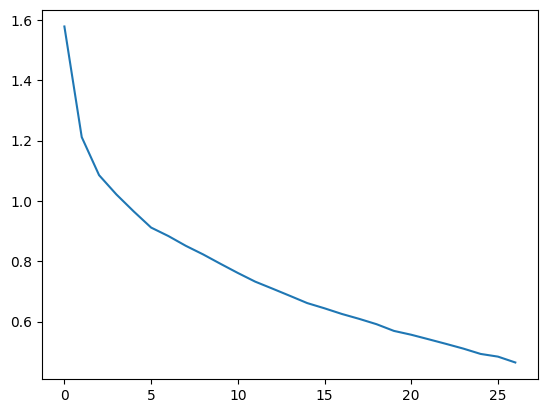

In [87]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure
plt.plot(all_losses)
plt.show()

In [93]:
def evaluation(rnn,testing_data,classes):
    confusion = torch.zeros(len(classes),len(classes))
    rnn.eval()
    with torch.no_grad():
        for i in range(len(testing_data)):
            (text,label,text_tensor,label_tensor) = testing_data[i]
            output = rnn(text_tensor)
            guess,guess_i = label_from_output(output,classes)
            label_i = classes.index(label)
            confusion[label_i][guess_i]+=1

    for i in range(len(classes)):
        denom = confusion[i].sum()
        if denom>0:
            confusion[i] = confusion[i]/denom

    # Set up plot
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(confusion.cpu().numpy())
    fig.colorbar(cax)

    ax.set_xticks(np.arange(len(classes)), labels=classes,rotation=90)
    ax.set_yticks(np.arange(len(classes)),labels = classes)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()
    

    
    
            

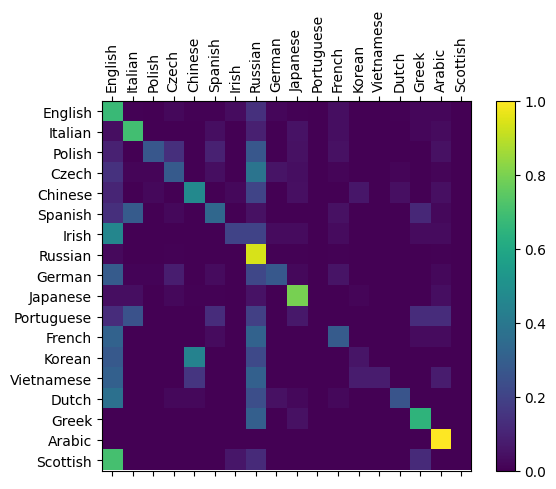

In [94]:
evaluation(rnn,test_set,classes = alldata.labels_unique)